<a href="https://colab.research.google.com/github/s4viom3ndes/Machine_Learn-Colab/blob/main/Ic_estudo_Classifica%C3%A7%C3%A3o_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
len(roses)
#PIL.Image.open(str(roses[0]))

641

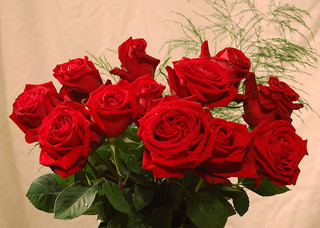

In [ ]:
PIL.Image.open(str(roses[1]))

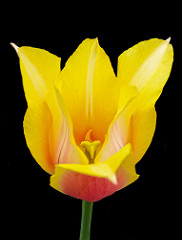

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

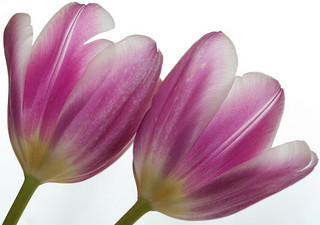

In [ ]:
PIL.Image.open(str(tulips[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
# Função que cria um conjunto de dados para treino
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Função que cria um conjunto de dados para validação
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Aqui transformamos os subdiretórios do conujunto de imagens em classes
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


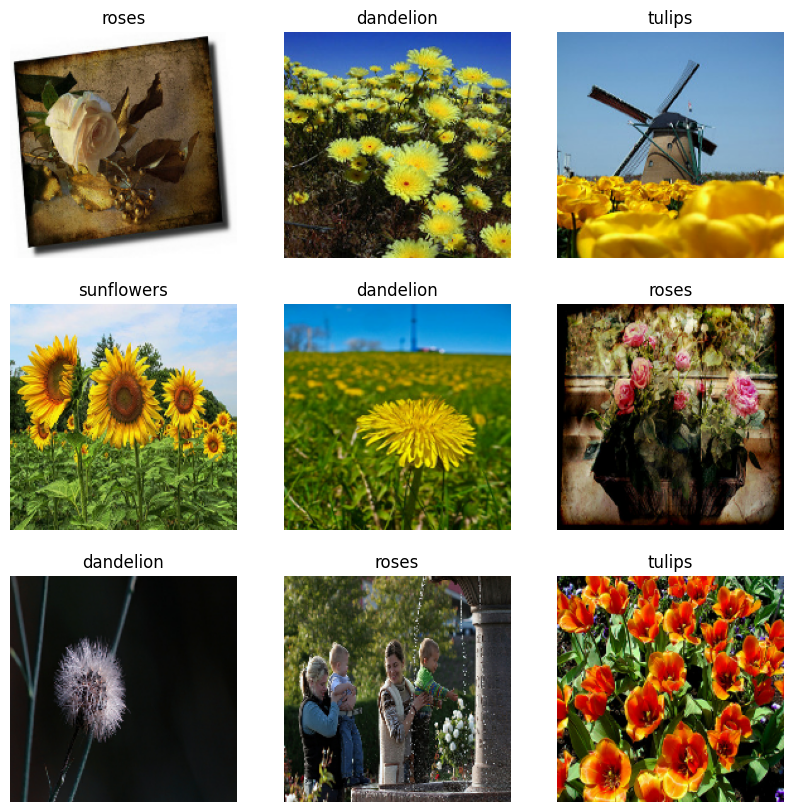

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE #otimizar o carregamento de Dados

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #Pré-carregamento
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) #Pré-carregamento

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))# Aplicando a nomalização a todas as camadas do conjunto de dados
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# valores de pixel entre `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Criando o modelo

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'), #detecta caracteristicas e reconheçe padrões
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

NameError: ignored

In [ ]:
model.compile(optimizer='adam', # Realiza  ajuste de de pesos da rede neural
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# Treinando o modelo

In [ ]:
epochs=10 #vezes em que o algoritimo será treinado
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 104s 1s/step - loss: 1.2275 - accuracy: 0.4939 - val_loss: 1.0569 - val_accuracy: 0.5586
Epoch 2/10
92/92 [==============================] - 99s 1s/step - loss: 0.9536 - accuracy: 0.6206 - val_loss: 0.9897 - val_accuracy: 0.6022
Epoch 3/10
92/92 [==============================] - 100s 1s/step - loss: 0.7589 - accuracy: 0.7122 - val_loss: 0.8429 - val_accuracy: 0.6757
Epoch 4/10
92/92 [==============================] - 98s 1s/step - loss: 0.5437 - accuracy: 0.8004 - val_loss: 1.0519 - val_accuracy: 0.6294
Epoch 5/10
92/92 [==============================] - 98s 1s/step - loss: 0.3326 - accuracy: 0.8896 - val_loss: 1.0748 - val_accuracy: 0.6458
Epoch 6/10
92/92 [==============================] - 99s 1s/step - loss: 0.1929 - accuracy: 0.9394 - val_loss: 1.1228 - val_accuracy: 0.6662
Epoch 7/10
92/92 [==============================] - 93s 1s/step - loss: 0.0810 - accuracy: 0.9768 - val_loss: 1.4772 - val_accuracy: 0.6403
Epoch 8/10
92/92 [

# Resultado

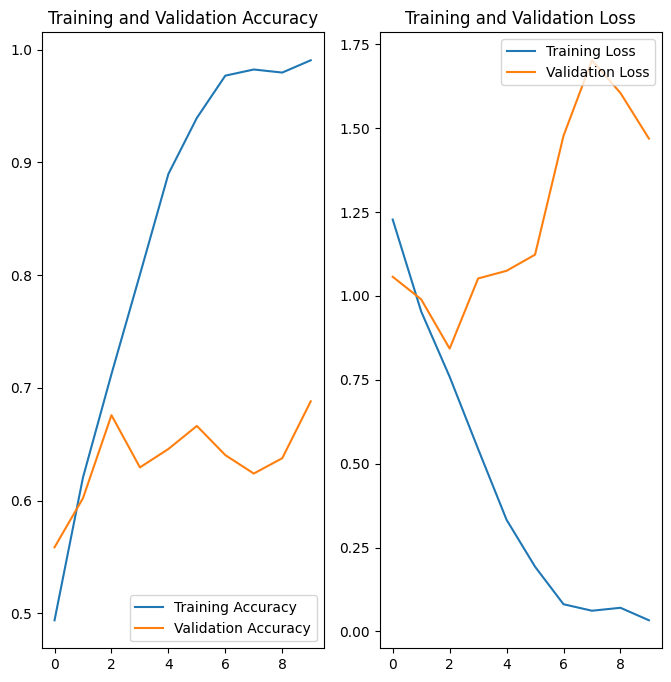

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Corrigindo o overfitting com o aumento de dados

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

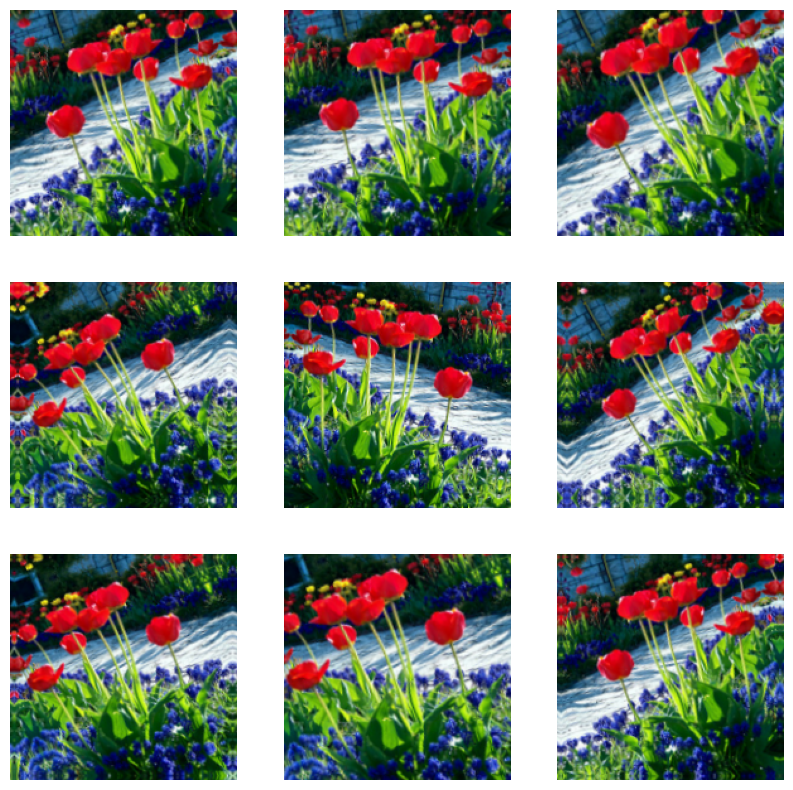

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compilando e treinando o modelo novamente

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 118s 1s/step - loss: 1.4218 - accuracy: 0.3767 - val_loss: 1.1824 - val_accuracy: 0.5177
Epoch 2/15
92/92 [==============================] - 121s 1s/step - loss: 1.0918 - accuracy: 0.5582 - val_loss: 1.2386 - val_accuracy: 0.5054
Epoch 3/15
92/92 [==============================] - 116s 1s/step - loss: 1.0033 - accuracy: 0.6046 - val_loss: 0.9379 - val_accuracy: 0.6226
Epoch 4/15
92/92 [==============================] - 119s 1s/step - loss: 0.9302 - accuracy: 0.6403 - val_loss: 0.9509 - val_accuracy: 0.6213
Epoch 5/15
92/92 [==============================] - 114s 1s/step - loss: 0.8579 - accuracy: 0.6655 - val_loss: 0.8836 - val_accuracy: 0.6526
Epoch 6/15
92/92 [==============================] - 113s 1s/step - loss: 0.8019 - accuracy: 0.6993 - val_loss: 0.8281 - val_accuracy: 0.6785
Epoch 7/15
92/92 [==============================] - 116s 1s/step - loss: 0.7612 - accuracy: 0.7119 - val_loss: 0.8114 - val_accuracy: 0.6921
Epoch 8/15
92

## Resultados após a correção do overfitting

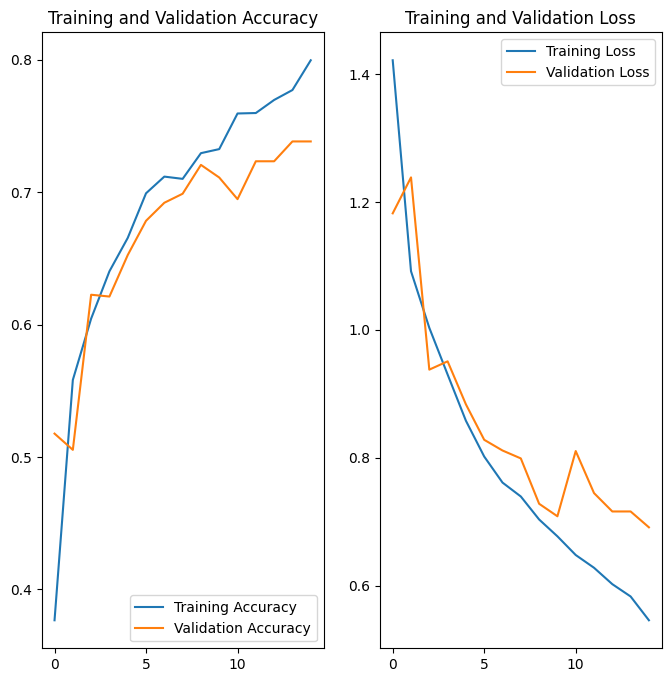

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Aplicando o modelos a imagens que não foram incluidas no teste

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 51ms/step
This image most likely belongs to sunflowers with a 85.88 percent confidence.
